### Percobaan 1

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
import os

Code di atas adalah contoh penggunaan beberapa pustaka populer dalam pemrosesan data dan visualisasi di Python. Pertama, `matplotlib.pyplot` digunakan untuk membuat plot/grafik. `numpy` (diimpor sebagai `np`) adalah pustaka untuk komputasi numerik, sering digunakan dalam operasi matematika dan array. `cv2` (diimpor sebagai `cv`) adalah OpenCV, digunakan untuk pengolahan citra. `pandas` diimpor sebagai `pd` dan digunakan untuk manipulasi dan analisis data terstruktur, seperti DataFrame. Terakhir, `os` digunakan untuk interaksi dengan sistem operasi, seperti mengelola direktori file.

## Data Loading

Code di bawah adalah sebuah fungsi Python yang menghitung jumlah file dalam setiap sub-direktori dari suatu direktori utama, kemudian menampilkan informasi tersebut dalam bentuk diagram batang menggunakan matplotlib. Fungsi `count_files_in_directory` menerima path ke suatu direktori dan mengembalikan jumlah file di dalamnya. Selanjutnya, dilakukan iterasi pada daftar sub-direktori (`directories`), setiap sub-direktori digabungkan dengan path induk untuk mendapatkan path lengkapnya, kemudian jumlah file dihitung dan disimpan dalam sebuah list (`file_counts`). Diagram batang kemudian dibuat menggunakan `plt.bar()` dengan label sumbu-x dari nama sub-direktori dan label sumbu-y berupa jumlah file. Untuk setiap batang, jumlah file ditambahkan sebagai teks pada diagram.

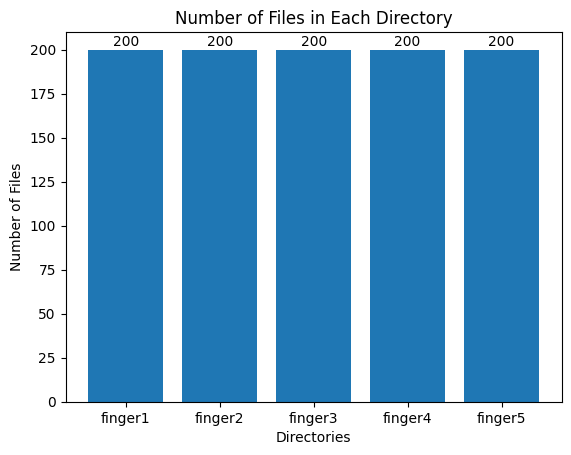

In [92]:
def count_files_in_directory(directory_path):
    file_count = sum(1 for entry in os.scandir(directory_path) if entry.is_file())
    return file_count

parent_directory = "../dataset/sample2"
directories = ["finger1", "finger2", "finger3", "finger4", "finger5"]

file_counts = []

for directory in directories:
    directory_path = os.path.join(parent_directory, directory)
    file_counts.append(count_files_in_directory(directory_path))

plt.bar(directories, file_counts)
plt.xlabel('Directories')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Directory')
for i, count in enumerate(file_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.show()

In [93]:
def load_images_from_folder(base_folder, target_size=(150, 150)):
    images = []
    labels = []
    
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv.imread(img_path)
                
                if img is not None:
                    img = cv.resize(img, target_size)
                    images.append(img)
                    labels.append(folder_name)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

Code di atas adalah sebuah fungsi Python yang digunakan untuk memuat gambar dari sub-direktori di dalam suatu direktori induk. Fungsi `load_images_from_folder` menerima path ke direktori induk (`base_folder`) dan ukuran target untuk gambar yang dimuat (default: 150x150 piksel). Di dalam fungsi, dilakukan iterasi pada setiap sub-direktori di dalam direktori induk, dan untuk setiap sub-direktori, setiap gambar di dalamnya dimuat dengan menggunakan OpenCV (`cv.imread`) dan diubah ukurannya sesuai dengan ukuran target. Gambar-gambar dan label-labelnya kemudian disimpan dalam list terpisah. Setelah iterasi selesai, list gambar dan label tersebut dikonversi menjadi array numpy sebelum dikembalikan oleh fungsi.

In [94]:
dataset_folder = '../dataset/sample2'
images, labels = load_images_from_folder(dataset_folder)

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (955, 150, 150, 3)
Labels shape: (955,)


Code di atas digunakan untuk memuat gambar-gambar dari sub-direktori di dalam suatu direktori dataset (`../dataset/sample2`) menggunakan fungsi `load_images_from_folder`. Hasil pemrosesan tersebut disimpan dalam variabel `images` dan `labels`. Setelah pemrosesan selesai, dilakukan pencetakan dimensi dari array gambar dan label menggunakan `print`, yang memberikan informasi tentang jumlah gambar dan label yang telah dimuat.

In [95]:
def display_sample_images(images, labels, num_samples=7):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        index = np.random.randint(0, len(images))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv.cvtColor(images[index], cv.COLOR_BGR2RGB))
        plt.title(labels[index])
        plt.axis('off')
    plt.show()

Code di atas adalah sebuah fungsi Python yang digunakan untuk menampilkan sampel-sampel gambar dari dataset. Fungsi `display_sample_images` menerima array gambar (`images`) dan array label (`labels`), serta parameter opsional `num_samples` yang menentukan jumlah sampel gambar yang akan ditampilkan (default: 7). Di dalam fungsi, dilakukan pembuatan sebuah gambar/plot menggunakan `plt.figure`, lalu dilakukan iterasi sebanyak `num_samples`. Pada setiap iterasi, sebuah indeks acak dipilih untuk memilih sebuah gambar dari dataset, kemudian gambar tersebut ditampilkan dengan label yang sesuai menggunakan `plt.imshow`, `plt.title`, dan `plt.axis('off')`. Setelah iterasi selesai, gambar-gambar tersebut ditampilkan menggunakan `plt.show()`.

Code di bawah memanggil fungsi `display_sample_images` untuk menampilkan sampel-sampel gambar dari dataset yang telah dimuat sebelumnya. Fungsi tersebut menerima array gambar (`images`) dan array label (`labels`) sebagai argumen, kemudian menampilkan beberapa gambar secara acak beserta labelnya dalam sebuah plot menggunakan matplotlib. Tampilan ini memungkinkan pengguna untuk melihat beberapa contoh gambar dari dataset bersama dengan labelnya.

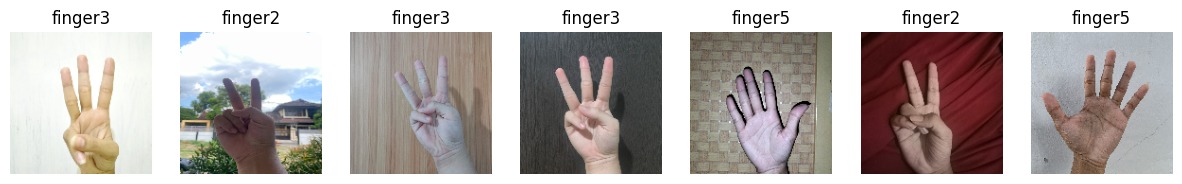

In [96]:
display_sample_images(images, labels)

In [97]:
def sample_grayscale(images, labels, sample_size=50):
    sampled_images = []
    sampled_labels = []

    data = list(zip(images, labels))
    data = np.array(data, dtype=object)
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        label_data = data[data[:, 1] == label]
        sampled_data = label_data[np.random.choice(label_data.shape[0], min(sample_size, label_data.shape[0]), replace=False)]
        
        for img, lbl in sampled_data:
            gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            sampled_images.append(gray_img)
            sampled_labels.append(lbl)
    
    sampled_images = np.array(sampled_images)
    sampled_labels = np.array(sampled_labels)
    
    return sampled_images, sampled_labels

Code di atas merupakan sebuah fungsi, yaitu `sample_grayscale`, bertujuan untuk mengambil sampel gambar dari setiap kelas label dalam dataset gambar yang sudah dimuat sebelumnya. Parameter `sample_size` menentukan jumlah maksimum sampel yang diambil dari setiap kelas. Di dalam fungsi, gambar-gambar dikonversi menjadi citra skala keabuan (grayscale) menggunakan `cv.cvtColor` dan disimpan dalam list `sampled_images`, sementara label-labelnya disimpan dalam list `sampled_labels`. Sampel-sampel ini kemudian dikembalikan sebagai array numpy dengan label yang sesuai. 

In [98]:
sampled_images, sampled_labels = sample_grayscale(images, labels, sample_size=50)

print('Grayscale Images shape:', sampled_images.shape)
print('Grayscale Labels shape:', sampled_labels.shape)

Grayscale Images shape: (250, 150, 150)
Grayscale Labels shape: (250,)


Code di atas memanggil fungsi `sample_grayscale` untuk mengambil sampel gambar dari dataset yang telah dimuat sebelumnya, dengan parameter `sample_size=50` yang menentukan jumlah maksimum sampel yang diambil dari setiap kelas. Hasil dari pemrosesan tersebut disimpan dalam variabel `sampled_images` dan `sampled_labels`. Setelah itu, dilakukan pencetakan dimensi dari array citra skala keabuan dan label menggunakan `print`, memberikan informasi tentang jumlah sampel gambar dan label yang telah diambil.

## Data Preparation

### Data Augmentation

In [99]:
def augment_images(images, labels):
    augmented_images = []
    augmented_labels = []
    
    for img, label in zip(images, labels):
        augmented_images.append(img)
        augmented_labels.append(label)

        img_90 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
        augmented_images.append(img_90)
        augmented_labels.append(label)

        img_180 = cv.rotate(img, cv.ROTATE_180)
        augmented_images.append(img_180)
        augmented_labels.append(label)

        img_270 = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
        augmented_images.append(img_270)
        augmented_labels.append(label)
    
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    
    return augmented_images, augmented_labels

Code di atas merupakan sebuah fungsi, yaitu `augment_images` yang mengimplementasikan augmentasi data dengan memutar setiap gambar dalam dataset sebanyak 90 derajat searah jarum jam (ROTATE_90_CLOCKWISE), 180 derajat (ROTATE_180), dan 270 derajat berlawanan arah jarum jam (ROTATE_90_COUNTERCLOCKWISE). Hasil augmentasi, yang mencakup gambar-gambar asli dan hasil rotasi, disimpan dalam list `augmented_images` dan `augmented_labels`, kemudian dikembalikan sebagai array numpy.

In [100]:
augmented_images, augmented_labels = augment_images(sampled_images, sampled_labels)

print('Augmented Images shape:', augmented_images.shape)
print('Augmented Labels shape:', augmented_labels.shape)

Augmented Images shape: (1000, 150, 150)
Augmented Labels shape: (1000,)


Code di atas memanggil fungsi `augment_images` untuk melakukan augmentasi data pada sampel gambar dan label yang telah diambil sebelumnya. Hasil dari augmentasi tersebut disimpan dalam variabel `augmented_images` dan `augmented_labels`. Kemudian, dilakukan pencetakan dimensi dari array gambar yang telah di-augmentasi beserta dengan labelnya menggunakan `print`, memberikan informasi tentang jumlah gambar dan label setelah proses augmentasi.

### Preprocessing

#### Preprocessing 1

In [101]:
def apply_mean_filter(images, labels, kernel_size=3):
    row = int((kernel_size - 1) / 2)
    column = int((kernel_size - 1) / 2)
    window = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    filtered_images = []
    for img, label in zip(images, labels):
        img_pad = np.pad(img, [(row, row), (column, column)], mode="constant")
        result = np.zeros(img_pad.shape)
        
        for i in range(row, img_pad.shape[0] - row):
            for j in range(column, img_pad.shape[1] - column):
                img_pixels = img_pad[i - row:i + row + 1, j - column:j + column + 1]
                result[i, j] = np.sum(img_pixels * window)
        
        filtered_img = result[row:img_pad.shape[0] - row, column:img_pad.shape[1] - column]
        filtered_images.append(filtered_img)
    
    filtered_images = np.array(filtered_images)
    
    return filtered_images, labels

Code di atas merupakan sebuah fungsi, yaitu `apply_mean_filter` yang menerapkan filter rata-rata pada setiap gambar dalam dataset, dengan ukuran kernel yang ditentukan (default: 3x3). Di dalam fungsi, sebuah kernel rata-rata dibuat dengan ukuran yang sesuai, lalu setiap gambar diproses dengan menggeser kernel di sepanjang gambar dan mengalikannya dengan bagian gambar yang berada di bawah kernel. Hasil perkalian ini kemudian dijumlahkan dan dinormalisasi sesuai dengan ukuran kernel. Gambar hasil filter rata-rata disimpan dalam list `filtered_images` dan kemudian dikembalikan bersama dengan labelnya sebagai array numpy.

In [102]:
filtered_images, filtered_labels = apply_mean_filter(augmented_images, augmented_labels)

print('Filtered Images shape:', filtered_images.shape)
print('Filtered Labels shape:', filtered_labels.shape)

Filtered Images shape: (1000, 150, 150)
Filtered Labels shape: (1000,)


Code di atas memanggil fungsi `apply_mean_filter` untuk menerapkan filter rata-rata pada gambar-gambar yang telah di-augmentasi sebelumnya, dengan ukuran kernel default 3x3. Hasil dari proses filtering tersebut disimpan dalam variabel `filtered_images` dan `filtered_labels`. Selanjutnya, dilakukan pencetakan dimensi dari array gambar yang telah di-filter bersama dengan labelnya menggunakan `print`, memberikan informasi tentang jumlah gambar dan label setelah proses filtering.

In [103]:
def display_grayimages(images, labels, num_samples=7):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        index = np.random.randint(0, len(images))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(labels[index])
        plt.axis('off')
    plt.show()

Code di atas adalah sebuah fungsi Python yang digunakan untuk menampilkan sampel-sampel gambar dalam citra skala keabuan (grayscale). Fungsi `display_grayimages` menerima array gambar grayscale (`images`) dan array label (`labels`), serta parameter opsional `num_samples` yang menentukan jumlah sampel gambar yang akan ditampilkan (default: 7). Di dalam fungsi, dilakukan pembuatan sebuah gambar/plot menggunakan `plt.figure`, lalu dilakukan iterasi sebanyak `num_samples`. Pada setiap iterasi, sebuah indeks acak dipilih untuk memilih sebuah gambar dari dataset, kemudian gambar tersebut ditampilkan dengan menggunakan `plt.imshow` dengan colormap grayscale (`cmap='gray'`), `plt.title` untuk menampilkan label, dan `plt.axis('off')` untuk menyembunyikan sumbu. Setelah iterasi selesai, gambar-gambar tersebut ditampilkan menggunakan `plt.show()`.

#### Preprocessing 2

In [104]:
def konvolusi(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result = np.zeros(image.shape)
    padded_image = np.pad(image, ((kernel_height//2, kernel_height//2), (kernel_width//2, kernel_width//2)), mode='constant')
    for i in range (image.shape[0]):
        for j in range(image.shape[1]):
            convolution_value = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    convolution_value += padded_image[i + ki][j + kj] * kernel[ki][kj]

            result[i][j] = convolution_value

    return result

Code di atas merupakan sebuah fungsi, yaitu `konvolusi` yang menerapkan operasi konvolusi pada sebuah gambar grayscale (`image`) menggunakan sebuah kernel (`kernel`). Di dalam fungsi, gambar di-pad terlebih dahulu sesuai dengan ukuran kernel. Kemudian, dilakukan iterasi untuk setiap piksel pada gambar. Pada setiap iterasi, nilai konvolusi dihitung dengan mengalikan nilai piksel dan nilai kernel yang bertumpang tindih pada piksel yang sedang dihitung, dan kemudian nilai-nilai tersebut dijumlahkan. Nilai konvolusi yang dihasilkan ditempatkan pada posisi yang sesuai pada gambar hasil (`result`). Setelah iterasi selesai, gambar hasil konvolusi dikembalikan.

In [105]:
sobelx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobely = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

Sobel merupakan filter yang umum digunakan dalam pengolahan citra untuk mendeteksi tepi. Variabel `sobelx` dan `sobely` adalah matriks kernel yang digunakan dalam operasi deteksi tepi menggunakan operator Sobel. `sobelx` digunakan untuk mendeteksi tepi horizontal, sementara `sobely` digunakan untuk mendeteksi tepi vertikal. Dengan menerapkan operasi konvolusi menggunakan matriks kernel ini pada gambar grayscale, kita dapat mengekstraksi informasi tentang tepi horisontal dan vertikal dari gambar tersebut.

In [106]:
def sobel(image, sobelx, sobely):
    x_gradient = konvolusi(image, sobelx)
    y_gradient = konvolusi(image, sobely)
    result = np.sqrt(x_gradient**2 + y_gradient**2)
    return result

def sobel_with_label(images, labels, sobelx, sobely):
    sobel_images = []
    sobel_labels = []
    
    for img, label in zip(images, labels):
        sobel_img = sobel(img, sobelx, sobely)
        sobel_images.append(sobel_img)
        sobel_labels.append(label)
    
    sobel_images = np.array(sobel_images)
    sobel_labels = np.array(sobel_labels)
    
    return sobel_images, sobel_labels

Code di atas merupakan sebuah fungsi, yaitu `sobel` yang menerapkan operasi deteksi tepi menggunakan operator Sobel pada gambar grayscale (`image`). Pertama, dilakukan konvolusi gambar dengan kernel Sobel horizontal (`sobelx`) dan vertical (`sobely`) menggunakan fungsi `konvolusi`. Hasil dari kedua konvolusi ini kemudian digunakan untuk menghitung gradien magnitude, yang merepresentasikan tingkat perubahan intensitas piksel dalam gambar, menggunakan rumus sqrt(x_gradient^2 + y_gradient^2). Fungsi `sobel_with_label` menerapkan operasi deteksi tepi Sobel pada setiap gambar dalam dataset, dan mengembalikan gambar-gambar hasil deteksi tepi beserta dengan labelnya.

In [107]:
sobel_images, sobel_labels = sobel_with_label(filtered_images, filtered_labels, sobelx, sobely)

print('Filtered Images shape:', sobel_images.shape)
print('Filtered Labels shape:', sobel_labels.shape)

Filtered Images shape: (1000, 150, 150)
Filtered Labels shape: (1000,)


Code di atas memanggil fungsi `sobel_with_label` untuk menerapkan operasi deteksi tepi Sobel pada gambar-gambar yang telah di-filter sebelumnya. Hasil dari proses deteksi tepi tersebut disimpan dalam variabel `sobel_images` dan `sobel_labels`. Kemudian, dilakukan pencetakan dimensi dari array gambar hasil deteksi tepi beserta dengan labelnya menggunakan `print`, memberikan informasi tentang jumlah gambar dan label setelah proses deteksi tepi.

Code di bawah memanggil fungsi `display_grayimages` untuk menampilkan sampel-sampel gambar hasil deteksi tepi Sobel yang telah dihasilkan, bersama dengan labelnya. Dengan menggunakan fungsi ini, kita dapat melihat representasi visual dari gambar-gambar setelah proses deteksi tepi.

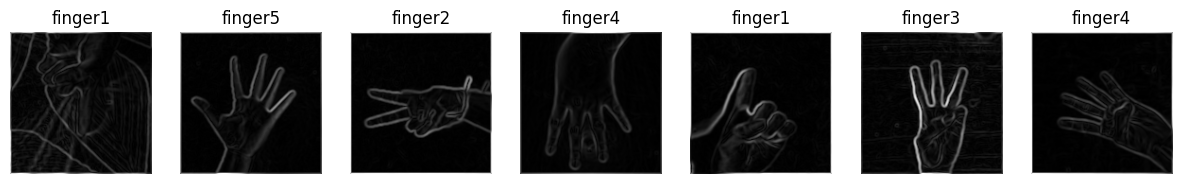

In [108]:
display_grayimages(sobel_images, sobel_labels)

### Feature Extraction

In [109]:
def contrast(glcm):
    contrast = np.sum(glcm * (np.arange(glcm.shape[0])[:, None] - np.arange(glcm.shape[1]))**2)
    return contrast

Code di atas merupakan sebuah fungsi, yaitu `contrast` yang akan menghitung kontras (contrast) dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam penghitungan, setiap elemen GLCM dikalikan dengan kuadrat perbedaan jarak antara nilai pixel yang terkait. Hasil dari operasi ini kemudian dijumlahkan untuk mendapatkan nilai kontras keseluruhan. Dengan demikian, nilai kontras memberikan informasi tentang seberapa besar variasi intensitas piksel di dalam gambar.

In [110]:
def dissimilarity(glcm):
    dissimilarity = np.sum(glcm * np.abs(np.arange(glcm.shape[0])[:, None] - np.arange(glcm.shape[1])))
    return dissimilarity

Code di atas merupakan sebuah fungsi, yaitu `dissimilarity` yang akan menghitung dissimilarity dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam perhitungannya, setiap elemen GLCM dikalikan dengan nilai absolut dari perbedaan jarak antara nilai pixel yang terkait. Hasil dari operasi ini kemudian dijumlahkan untuk mendapatkan nilai dissimilarity keseluruhan. Nilai dissimilarity memberikan informasi tentang seberapa besar perbedaan antara intensitas piksel di dalam gambar.

In [111]:
def homogeneity(glcm):
    homogeneity = np.sum(glcm / (1 + np.abs(np.arange(glcm.shape[0])[:, None] - np.arange(glcm.shape[1]))))
    return homogeneity

Code di atas merupakan sebuah fungsi, yaitu `homogeneity` yang akan menghitung homogenitas dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam perhitungannya, setiap elemen GLCM dibagi dengan nilai 1 ditambah nilai absolut dari perbedaan jarak antara nilai pixel yang terkait. Hasil dari operasi ini kemudian dijumlahkan untuk mendapatkan nilai homogenitas keseluruhan. Nilai homogenitas memberikan informasi tentang seberapa seragam distribusi intensitas piksel di dalam gambar.

In [112]:
def energy(glcm):
    energy = np.sum(glcm**2)
    return energy

Code di atas merupakan sebuah fungsi, yaitu `energy` yang menghitung energi dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam perhitungannya, setiap elemen GLCM dikuadratkan dan kemudian dijumlahkan. Hasil dari operasi ini memberikan informasi tentang seberapa tinggi kontras gambar, dengan nilai energi yang tinggi menunjukkan adanya banyak perubahan intensitas piksel di dalam gambar.

In [113]:
def correlation(glcm):
    row, col = np.indices(glcm.shape)
    mean_row = np.sum(row * glcm)
    mean_col = np.sum(col * glcm)
    std_row = np.sqrt(np.sum((row - mean_row)**2 * glcm))
    std_col = np.sqrt(np.sum((col - mean_col)**2 * glcm))
    correlation = np.sum(((row - mean_row) * (col - mean_col)) * glcm) / (std_row * std_col)
    return correlation

Code di atas merupakan sebuah fungsi, yaitu `correlation` yang menghitung korelasi dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam perhitungannya, pertama-tama, indeks baris dan kolom dari GLCM dihitung menggunakan `np.indices`. Selanjutnya, dihitung mean dan standar deviasi untuk baris dan kolom menggunakan rumus yang sesuai. Nilai korelasi kemudian dihitung dengan menggunakan rumus korelasi Pearson, yang melibatkan perhitungan kovarians antara baris dan kolom GLCM, dibagi dengan produk dari standar deviasi baris dan kolom. Hasil dari operasi ini memberikan informasi tentang seberapa berkorelasinya intensitas piksel di dalam gambar.

In [114]:
def asm(glcm):
    asm = np.sum(glcm**2)
    return asm

Code di atas merupakan sebuah fungsi, yaitu `asm` (Angular Second Moment) yang menghitung nilai dari sebuah matriks GLCM (Gray-Level Co-occurrence Matrix). Dalam perhitungannya, setiap elemen GLCM dikuadratkan dan kemudian dijumlahkan. Hasil dari operasi ini memberikan informasi tentang seberapa homogen distribusi intensitas piksel di dalam gambar, dengan nilai yang tinggi menunjukkan bahwa intensitas piksel cenderung seragam di seluruh gambar.

In [116]:
angles = [0, 45, 90, 135]
distances = [1, 2, 3, 4, 5]
feature_data = []

for img in sobel_images:
    glcm = np.zeros((256, 256))
    for angle in angles:
        for distance in distances:
            for i in range(img.shape[0] - distance):
                for j in range(img.shape[1] - distance):
                    pixel1 = int(img[i, j])
                    pixel2 = int(img[i + distance, j + distance])

                    glcm[pixel1, pixel2] += 1
                    glcm[pixel2, pixel1] += 1
            glcm /= np.sum(glcm)

            contrast = contrast(glcm)
            dissimilarity = dissimilarity(glcm)
            homogeneity = homogeneity(glcm)
            energy = energy(glcm)
            correlation = correlation(glcm)
            asm = asm(glcm)

            feature_data.append([contrast, dissimilarity, homogeneity, energy, correlation, asm])

IndexError: index 257 is out of bounds for axis 0 with size 256

Code di atas digunakan untuk menghitung sejumlah fitur tekstur dari gambar-gambar hasil deteksi tepi Sobel. Pertama, matriks GLCM (Gray-Level Co-occurrence Matrix) diinisialisasi untuk setiap sudut dan jarak yang ditentukan. Selanjutnya, dilakukan perhitungan kontras, dissimilarity, homogeneity, energy, korelasi, dan ASM (Angular Second Moment) untuk setiap matriks GLCM yang dihasilkan. Fitur-fitur tersebut kemudian dikumpulkan dalam list `feature_data`, yang akan digunakan untuk analisis dan pembelajaran lebih lanjut.

In [117]:
df = pd.DataFrame(feature_data, columns=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM'])

df.to_csv('sobel_features.csv', index=False)
print('Ekstraksi fitur selesai dan disimpan ke sobel_features.csv')

Ekstraksi fitur selesai dan disimpan ke sobel_features.csv


Code di atas menggunakan pandas untuk membuat DataFrame dari data fitur yang telah diekstraksi sebelumnya, dengan kolom-kolom yang sesuai dengan nama fitur-fitur tersebut. DataFrame kemudian disimpan dalam format CSV dengan nama file 'sobel_features.csv' tanpa menyertakan indeks baris. Pesan 'Ekstraksi fitur selesai dan disimpan ke sobel_features.csv' dicetak sebagai indikasi bahwa proses ekstraksi fitur telah selesai dan file CSV telah berhasil disimpan.

### Features Selection

### Splitting Data

### Normalization

## Modeling

## Evaluation